In [3]:
import lightkurve as lk
import matplotlib.pyplot as plt

In [2]:
TIC = "TIC 284475976"

In [3]:
sector_data = lk.search_lightcurve(TIC, author="SPOC", sector=23)

In [4]:
sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 23,2020,SPOC,120,284475976,0.0


In [5]:
lc = sector_data.download()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

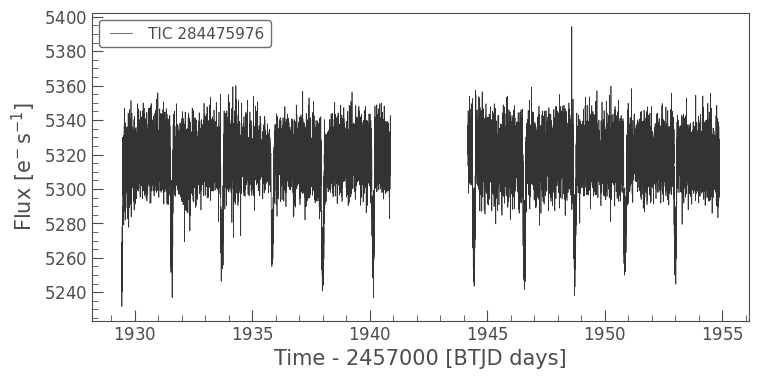

In [10]:
lc.plot()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

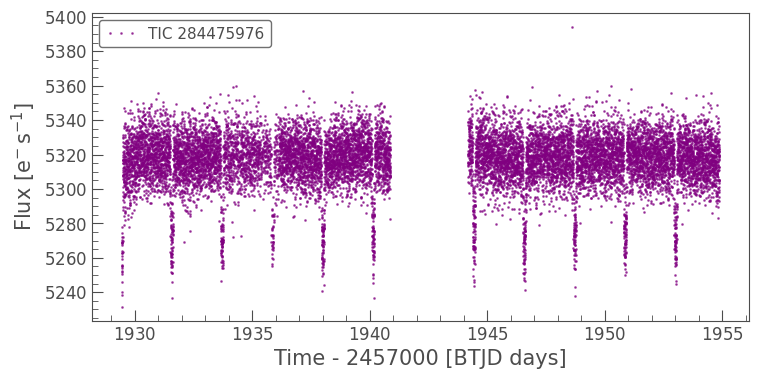

In [17]:
#enhance the plot
%matplotlib inline
lc.plot(linewidth=0, marker='.', color="purple", alpha=0.6 )

In [18]:
TIC_2 = "TIC 55525572"

In [19]:
available_data_all = lk.search_lightcurve(TIC_2, author="SPOC")

In [20]:
select_sector = available_data_all[0:4]

In [21]:
select_sector

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,55525572,0.0
1,TESS Sector 05,2018,SPOC,120,55525572,0.0
2,TESS Sector 06,2018,SPOC,120,55525572,0.0
3,TESS Sector 08,2019,SPOC,120,55525572,0.0


In [22]:
lc_collection = select_sector.download_all()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

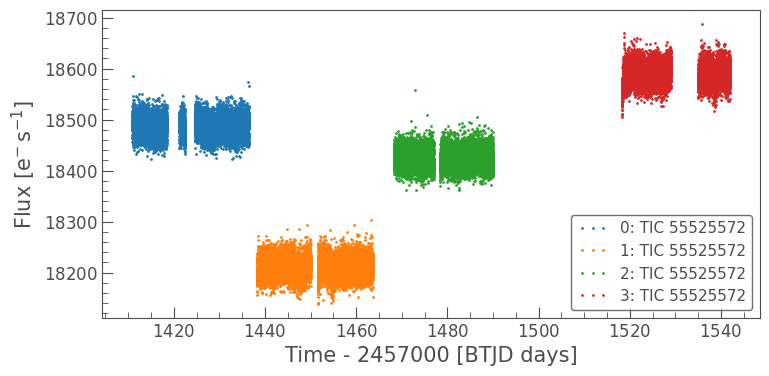

In [23]:
lc_collection.plot(linewidth = 0, marker='.')

In [24]:
#to make it easier to read, need to normalise the data
lc_collection_stitched = lc_collection.stitch() # stitch fun is for multiple sectors of data

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

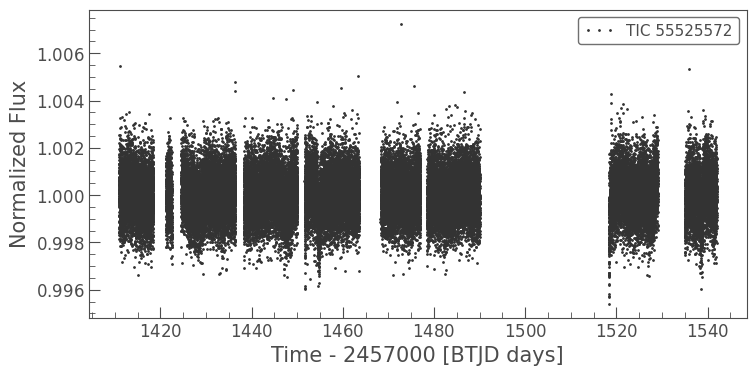

In [25]:
lc_collection_stitched.plot(linewidth = 0, marker='.')

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

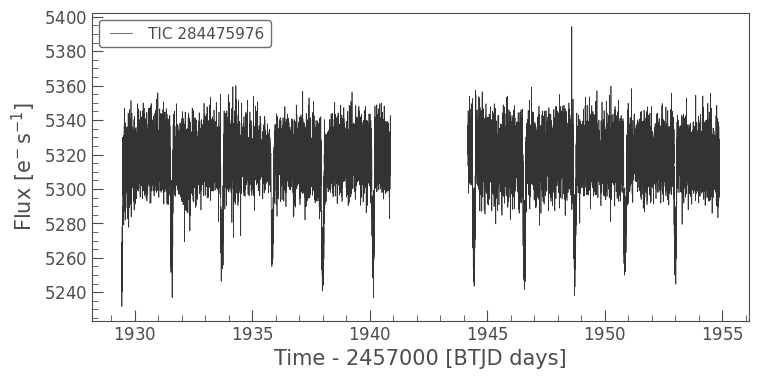

In [26]:
lc.plot()


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

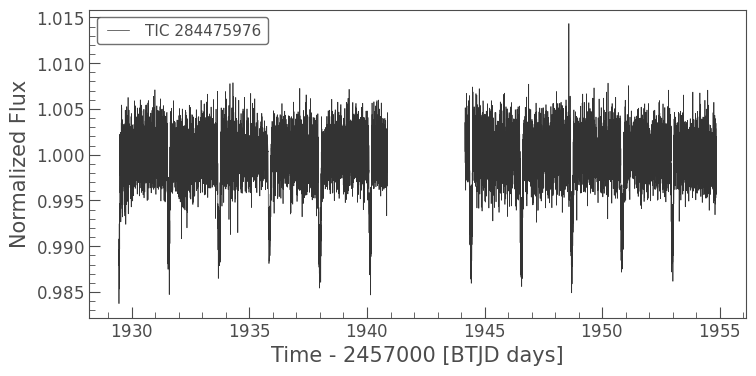

In [27]:
# normalize data from a single sector
lc.normalize().plot()

## Binning Data

In [14]:
TIC_3 = "TIC 55525572"

In [15]:
#search the available data and select data from a couple of sectors
available_data_select = lk.search_lightcurve(TIC_3, author='SPOC')[0:9]

In [16]:
# download the selected  data and 'stitch' the data from the different sectors together
lc_collect = available_data_select.download_all().stitch()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

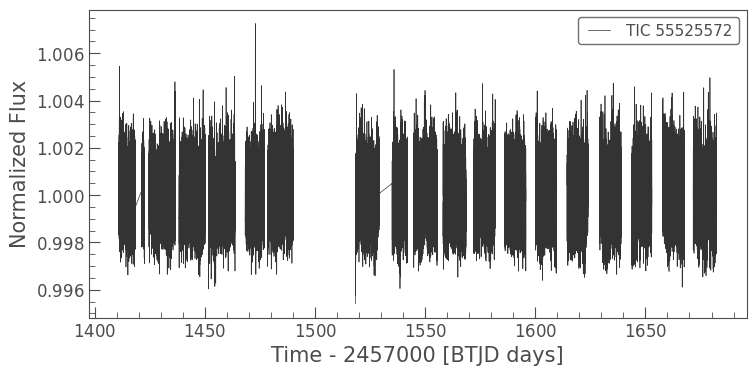

In [17]:
lc_collect.plot()

In [18]:
# the bin width needs to be in units of days
bin_time = 15 / 24 / 60

In [ ]:
lc_collect_binned = lc_collect.bin(bin_time)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

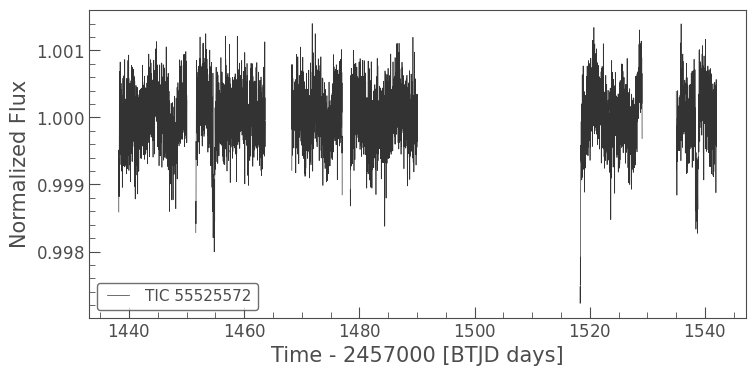

In [12]:
%matplotlib inline
lc_collect_binned.plot()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

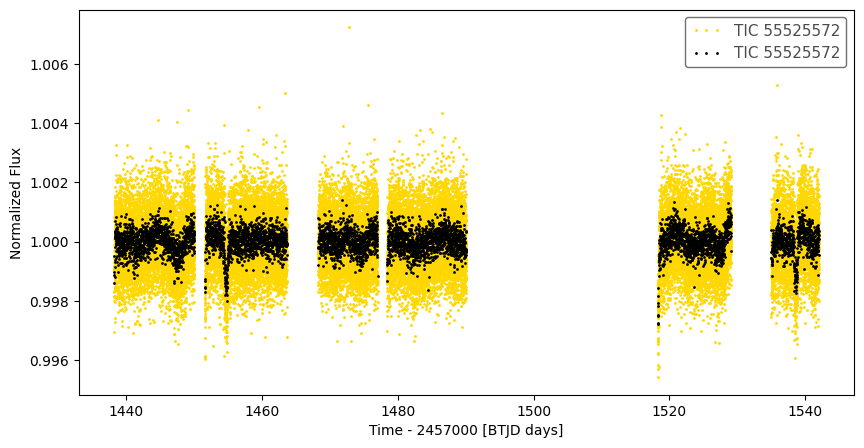

In [13]:
# in order to plot multiple data sets on one figure, define a plotting region using fig, ax = plt.subplots(...)
fig, ax = plt.subplots(figsize = (10,5))
lc_collect.plot(ax = ax, linewidth = 0, marker = 'o', color = 'gold', markersize = 1)
lc_collect_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'black', markersize = 1)

## Phase Folding

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

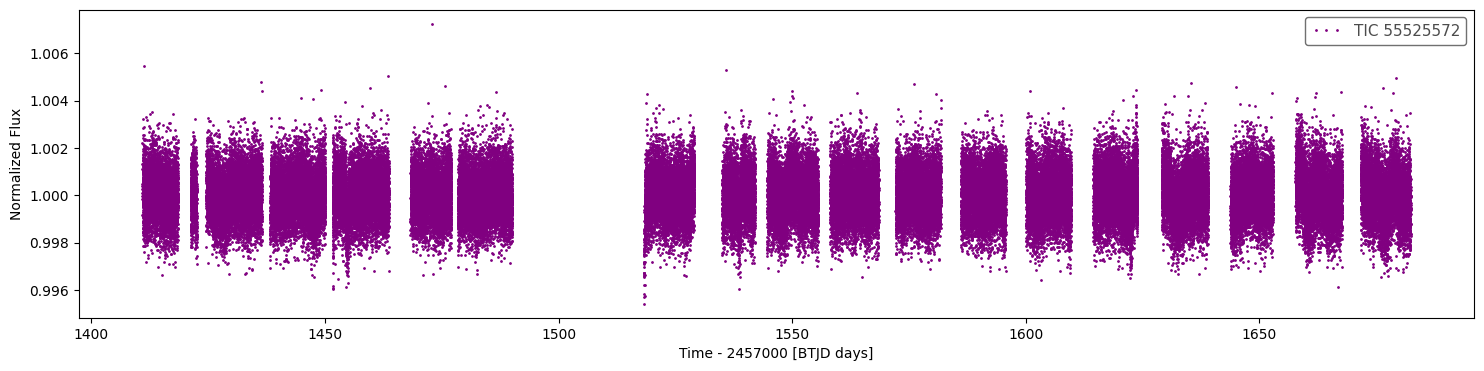

In [23]:
fig, ax = plt.subplots(figsize = (18,4))
lc_collect.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple', markersize = 1)

In [24]:
period = 83.8979
t0 = 2125.847

In [25]:
lc_phased = lc_collect.fold(period=period, epoch_time=t0)

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

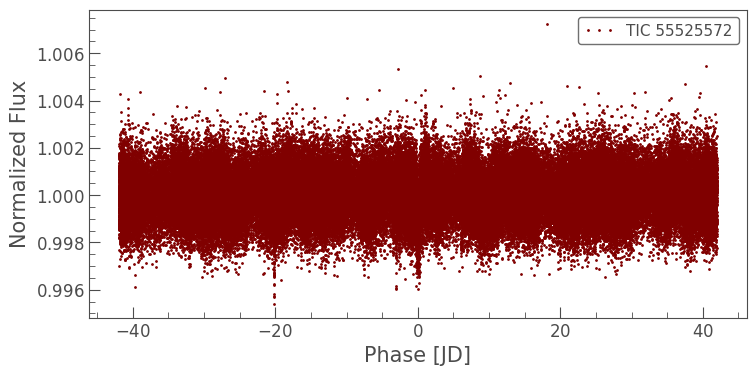

In [27]:
lc_phased.plot(linewidth = 0, color = 'maroon', marker = '.')

In [28]:
lc_phased_binned = lc_phased.bin(15/24/60)

(0.996, 1.004)

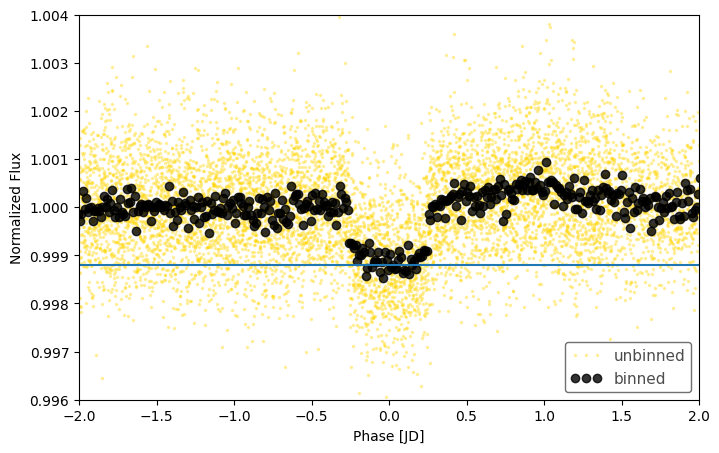

In [36]:
fig, ax = plt.subplots(figsize = (8,5))

lc_phased.plot(ax = ax, linewidth=0, marker='.', color="gold", alpha=0.3, markersize=3, label='unbinned')
lc_phased_binned.plot(ax = ax, marker='o', linewidth=0, color='black', alpha=0.8, markersize=6, label='binned')

plt.axhline(0.9988)
plt.xlim(-2, 2)
plt.ylim(0.996, 1.004)

In [44]:
# to get the size of the planet, add the numbers to the ecuation
from astropy import units as u
import numpy as np


In [45]:
transit_depth = 1 - 0.9988

# find the stellar radious on ExoFOP
R_star = 2.04354 * u.Rsun

r_pl_solar_radius = np.sqrt(transit_depth) * R_star # see ecuation written in the nb


In [39]:
r_pl_solar_radius

<Quantity 0.0707903 solRad>

In [46]:
# convert to earth radius
r_pl_earth_radius = r_pl_solar_radius.to(u.Rearth)

In [47]:
r_pl_earth_radius

<Quantity 7.72154924 earthRad>

#### IF RADIUS > 20 Earth radii, is prob not a planet but another star orbiting the current